In [27]:
import matplotlib.pyplot as plt
import pandas
import yfinance
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (16, 10)

### Create a ticker object for SBI.

In [3]:
sbi = yfinance.Ticker('sbin.ns')

### Get the stock information for the year 2010-2019

In [4]:
data = sbi.history(start = '2010-01-01', end = '2020-01-01')

In [5]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,198.109357,200.286383,198.109357,199.520065,11031470,0.0,0.0
2010-01-05,200.982999,201.157158,198.553431,199.594055,11613740,0.0,0.0
2010-01-06,200.025141,201.592602,198.980171,200.791458,14527930,0.0,0.0
2010-01-07,200.808863,201.157182,198.640541,199.668091,8576510,0.0,0.0
2010-01-08,199.763902,200.626009,198.553476,199.071609,10453820,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24,325.078653,326.054279,321.176148,323.371307,21747782,0.0,0.0
2019-12-26,324.883519,325.322563,320.102957,321.810303,24616942,0.0,0.0
2019-12-27,325.273771,330.103133,324.883526,329.029938,33477173,0.0,0.0


### Line chart for the period 2010-2019:

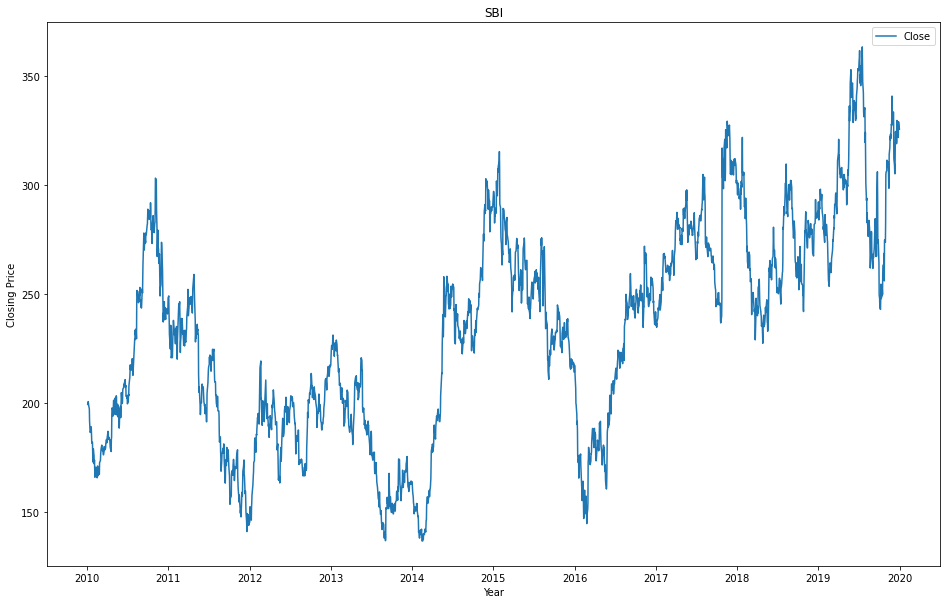

In [6]:
plt.title('SBI')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(data.index, data['Close'], label = 'Close')
plt.legend()

### Plotting the 100 day moving average

In [7]:
data['100MA'] = data['Close'].rolling(window = 100).mean()

In [8]:
data['100MA']

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2019-12-24    291.819064
2019-12-26    291.694672
2019-12-27    291.630769
2019-12-30    291.697599
2019-12-31    291.712721
Name: 100MA, Length: 2462, dtype: float64

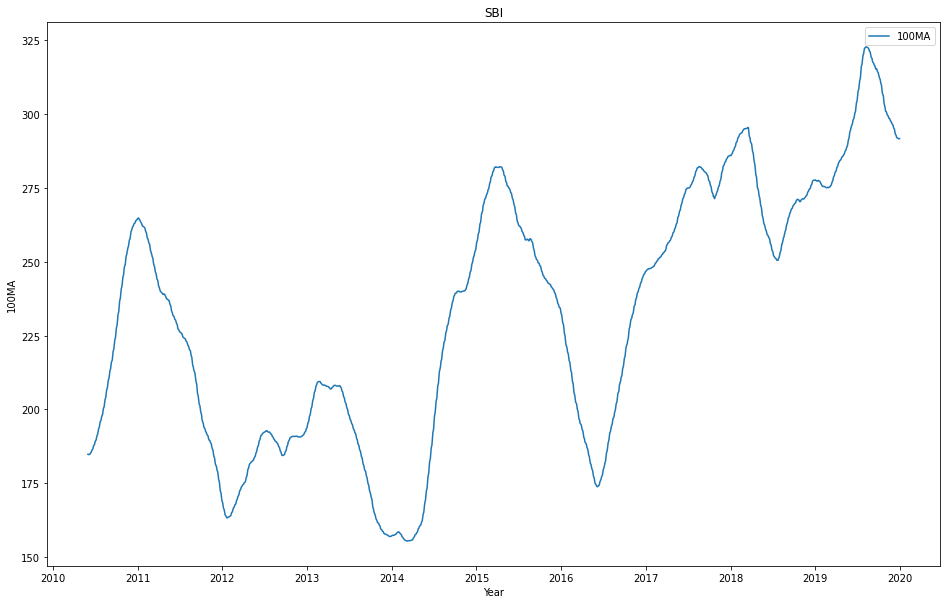

In [9]:
plt.title('SBI')
plt.xlabel('Year')
plt.ylabel('100MA')
plt.plot(data.index, data['100MA'], label = '100MA')
plt.legend()

### Plotting the 200 day moving average

In [10]:
data['200MA'] = data['Close'].rolling(window = 200).mean()

In [11]:
data['200MA']

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2019-12-24    305.387341
2019-12-26    305.697102
2019-12-27    306.036620
2019-12-30    306.355406
2019-12-31    306.651996
Name: 200MA, Length: 2462, dtype: float64

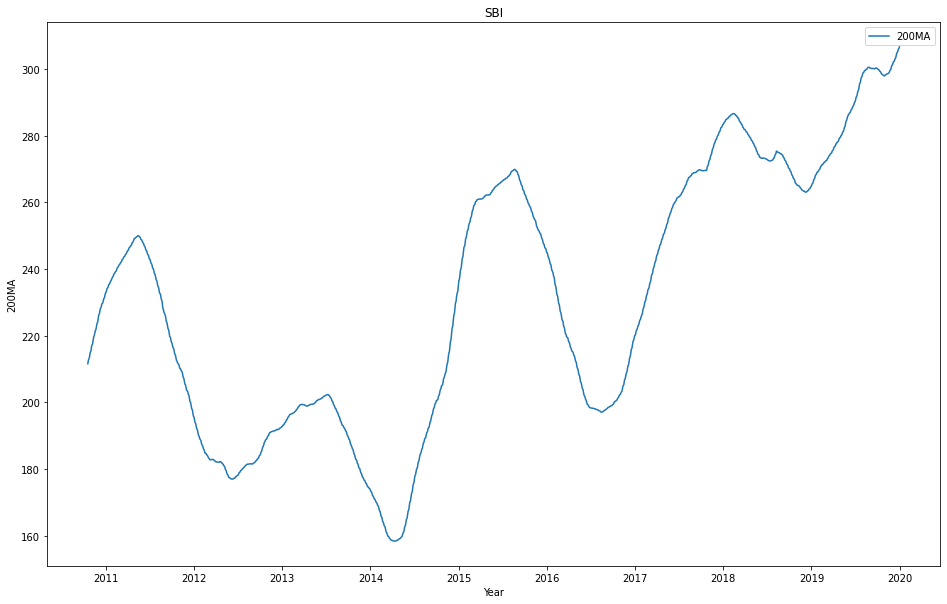

In [12]:
plt.title('SBI')
plt.xlabel('Year')
plt.ylabel('200MA')
plt.plot(data.index, data['200MA'], label = '200MA')
plt.legend()

### Visualizing the 200 day moving average and the 100 day moving average:

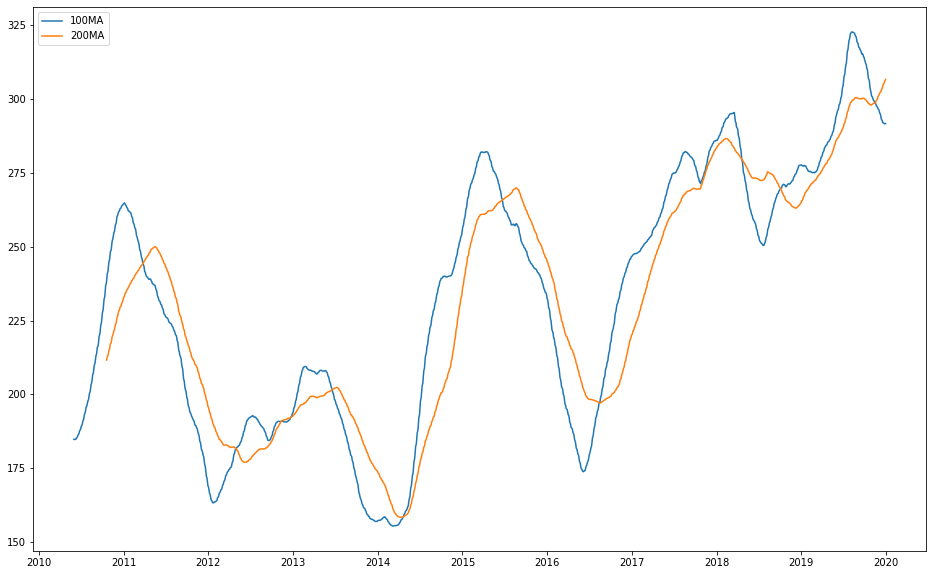

In [13]:
plt.plot(data.index, data['100MA'], label = '100MA')
plt.plot(data.index, data['200MA'], label = '200MA')
plt.legend()
plt.show()

### Create a ticker object for SBI.

### Visualizing all the parameters:

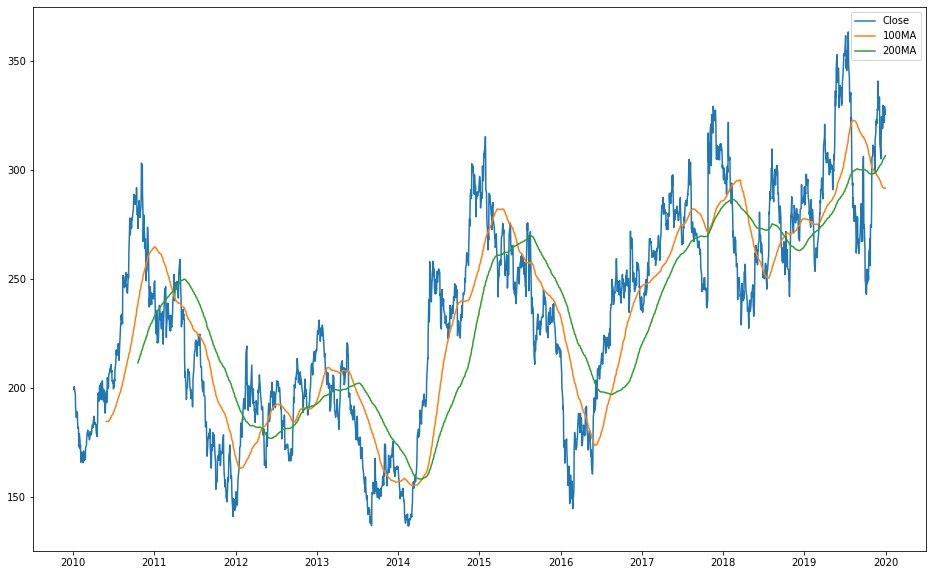

In [14]:
plt.plot(data.index, data['Close'], label = 'Close')
plt.plot(data.index, data['100MA'], label = '100MA')
plt.plot(data.index, data['200MA'], label = '200MA')
plt.legend()
plt.show()

### Observation:

#### If the 100 day moving average goes above the 200 day moving average than the stock price is expected to go up, 
#### otherwise it is expected to go down. (A very basic strategy used by stock market analysts) 

### Splitting data into training and testing:

In [15]:
# 70% of data for testing, 30% of data for testing
p_70 = int(len(data) * 0.7)
training_data = data['Close'][0 : p_70]
testing_data = data['Close'][p_70 : len(data)]

In [16]:
training_data = training_data.to_numpy().reshape(-1, 1)

In [17]:
testing_data = testing_data.to_numpy().reshape(-1, 1)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1) )

In [19]:
data_training_array = scaler.fit_transform(training_data)

In [20]:
data_training_array

array([[0.35107879],
       [0.35149333],
       [0.35820199],
       ...,
       [0.55609478],
       [0.58074272],
       [0.57532557]])

In [24]:
# Divide data into x_train and y_train.
x_train = []
y_train = []

# Window size = 100
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])

In [35]:
x_train = np.array(x_train)

In [36]:
y_train = np.array(y_train)

In [37]:
x_train.shape

(1623, 100, 1)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1) ) )
model.add(Dropout(0.2) )

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ) )
model.add(Dropout(0.3) )

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ) )
model.add(Dropout(0.4) )

model.add(LSTM(units = 120, activation = 'relu') )
model.add(Dropout(0.5) )

model.add(Dense(units = 1) )

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [42]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
51/51 [==============================] - 42s 481ms/step - loss: 0.0559
Epoch 2/50
51/51 [==============================] - 26s 501ms/step - loss: 0.0156
Epoch 3/50
51/51 [==============================] - 26s 510ms/step - loss: 0.0131
Epoch 4/50
51/51 [==============================] - 27s 531ms/step - loss: 0.0120
Epoch 5/50
51/51 [==============================] - 27s 534ms/step - loss: 0.0099
Epoch 6/50
51/51 [==============================] - 27s 538ms/step - loss: 0.0104
Epoch 7/50
51/51 [==============================] - 27s 527ms/step - loss: 0.0088
Epoch 8/50
51/51 [==============================] - 27s 529ms/step - loss: 0.0087
Epoch 9/50
51/51 [==============================] - 27s 533ms/step - loss: 0.0087
Epoch 10/50
51/51 [==============================] - 28s 542ms/step - loss: 0.0086
Epoch 11/50
51/51 [==============================] - 28s 540ms/step - loss: 0.0079
Epoch 12/50
51/51 [==============================] - 27s 537ms/step - loss: 0.0079
Epoch 13/50
5

In [43]:
model.save('keras_model.h5')

## Use testing data to test model.

In [47]:
data_training = data['Close'][0 : p_70]
data_testing = data['Close'][p_70 : len(data)]
past_100_days = data_testing.tail(100)

In [53]:
final = past_100_days.append(data_testing, ignore_index = True)

In [54]:
final.head()

0    309.419830
1    300.931915
2    292.931763
3    294.053711
4    282.834045
Name: Close, dtype: float64

In [55]:
final_df = final.to_numpy().reshape(-1, 1)

In [57]:
input_data = scaler.fit_transform(final_df)

In [60]:
input_data.shape

(839, 1)

In [62]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

In [63]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [64]:
x_test.shape

(739, 100, 1)

In [66]:
y_test.shape

(739,)

### Making predictions

In [67]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 6s 174ms/step


In [68]:
y_predicted.shape

(739, 1)

In [69]:
scaler.scale_

array([0.00736338])

In [70]:
scale_factor = 1 / 0.00736338

In [71]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

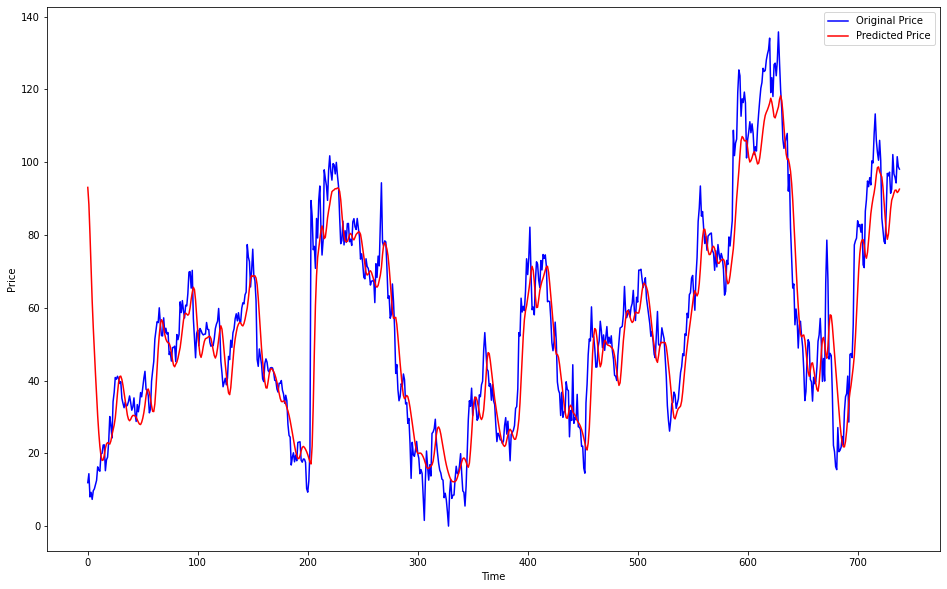

In [73]:
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()